# King County House Sales Data Prediction

In [88]:
# https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('data/kc_house_data.csv')

In [5]:
Data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [10]:
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Visualization Plots

### Price Distribution

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


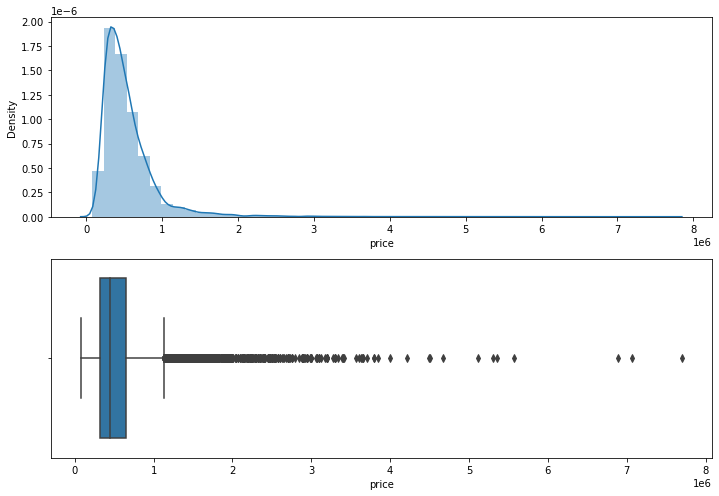

In [11]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])

fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

### Bedrooms, floors, bathrooms and grade count

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

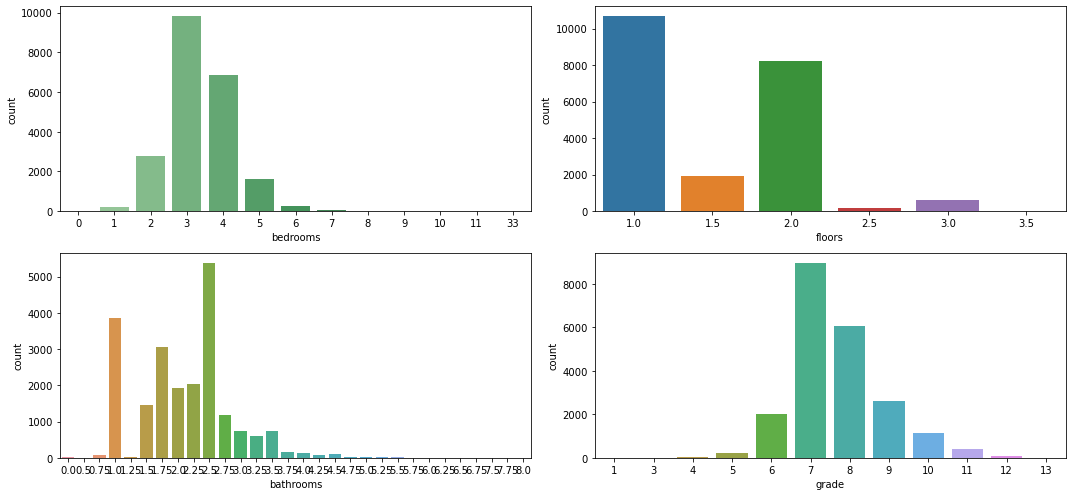

In [12]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)

fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette='Greens_d')

fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])

fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])

fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])

plt.tight_layout()

### Relationships between sqft of above, lot, living and basement and price

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-pack

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

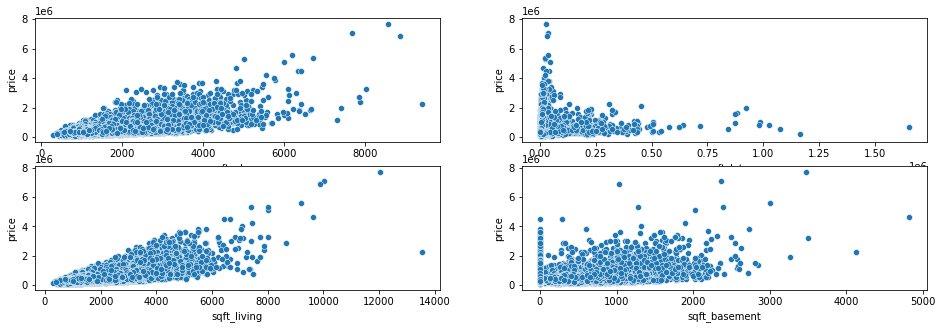

In [13]:
fig = plt.figure(figsize=(16,5))

fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])

fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'], Data['price'])

fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'], Data['price'])

fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'], Data['price'])

### Correlations between price and other columns

In [14]:
Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

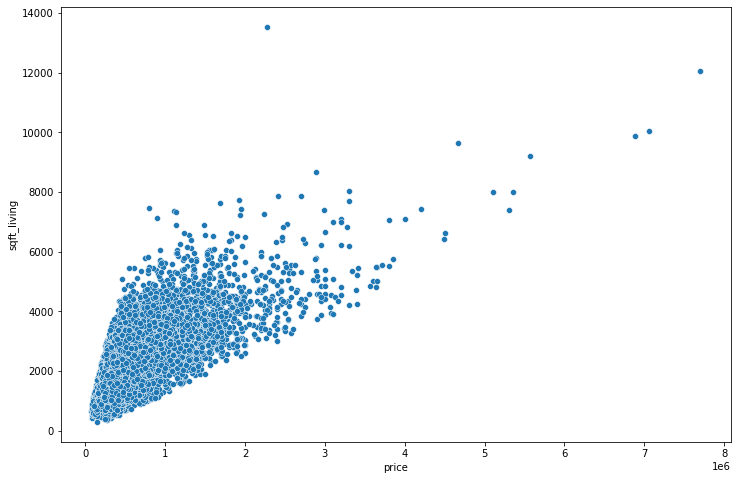

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='sqft_living', data=Data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

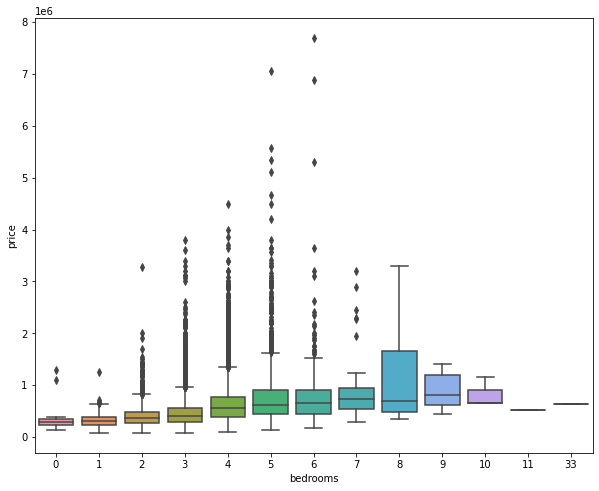

In [20]:
plt.figure(figsize = (10,8))
sns.boxplot(x='bedrooms', y='price', data = Data)

### Scatter plot of prices in various locations

<AxesSubplot:xlabel='long', ylabel='lat'>

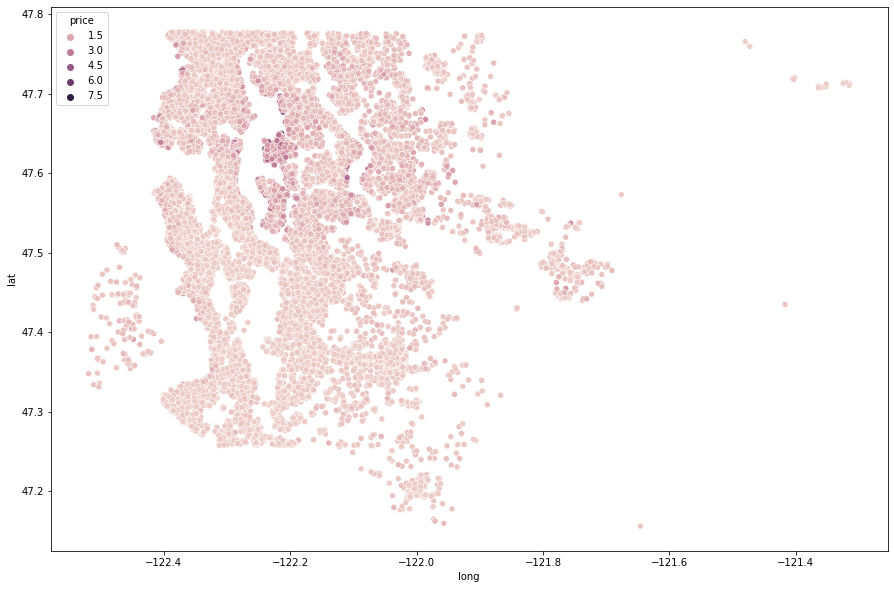

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long', y='lat', data=Data, hue='price')

In [22]:
non_top_1_perc = Data.sort_values('price', ascending=False).iloc[216:]

In [23]:
len(Data)*0.01

216.13

<AxesSubplot:xlabel='long', ylabel='lat'>

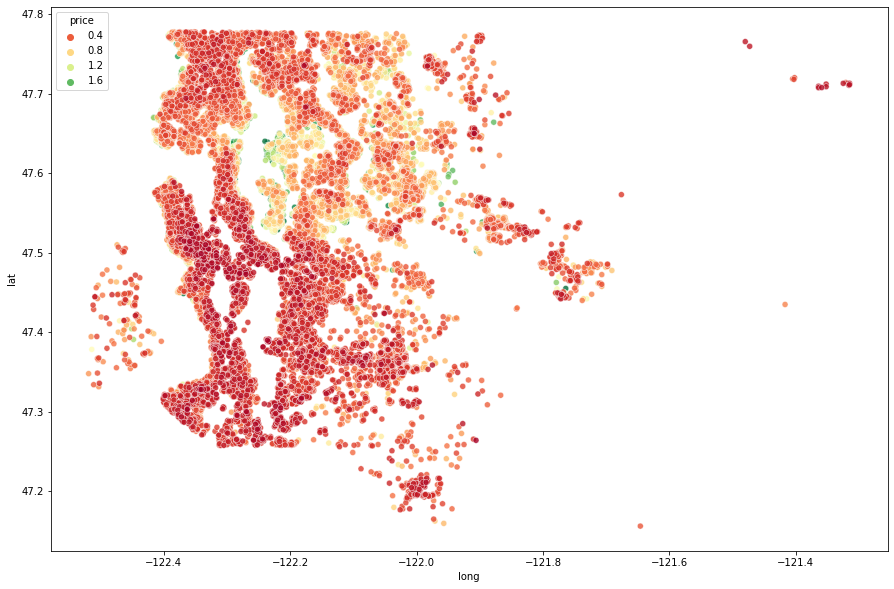

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, alpha=0.8, palette='RdYlGn', hue='price')

In [26]:
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year'>

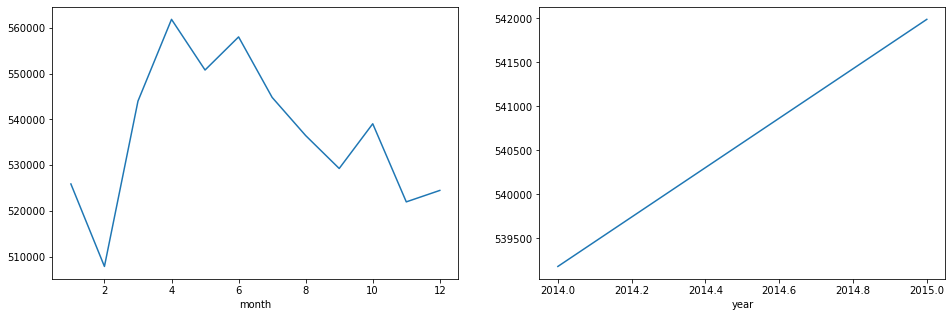

In [28]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()

fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [31]:
Data = Data.drop('date', axis=1)

KeyError: "['date'] not found in axis"

In [32]:
X = Data.drop('price', axis=1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [33]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-32174.2645862 ,  28314.47160234,  80960.8365489 ,   6428.24177905,
         3413.70406639,  49942.35152741,  36835.82051685,  21903.68879982,
       116003.40529456,  76073.5117404 ,  25375.83805414, -72994.52529983,
         7676.57141888,  78057.84710672, -17254.48220907,  18909.70160034,
       -10301.37920458,   4182.48580611,  17081.43533197])

In [57]:
X_train.shape

(14480, 19)

In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,349950.0,530667.784120
1,450000.0,667025.076946
2,635000.0,553195.043391
3,355500.0,346657.166101
4,246950.0,61378.186019
5,406550.0,481162.809294
6,350000.0,312819.788488
7,226500.0,273833.027682
8,265000.0,280571.649291
9,656000.0,532966.844438


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

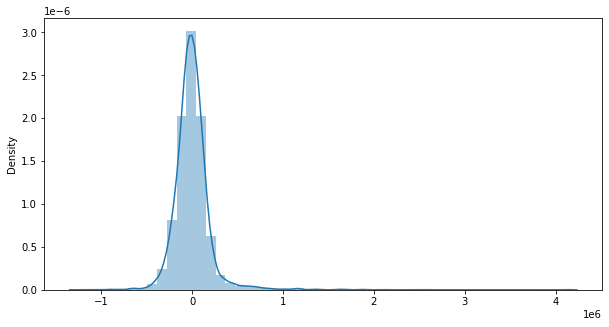

In [39]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test - y_pred)
sns.distplot(residuals)

In [41]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test, y_predd)))

Mean Absolute Error: 125933.74
Mean Squared Error:40601153229.62
Root Mean Squared Error:201497.28
Variance score is: 0.70


In [42]:
Data['price'].mean()

540088.1417665294

In [44]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train, y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.69
Test Score 0.70


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam

In [86]:
model = Sequential([
    Input(shape=(19,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               10240     
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_62 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_63 (Dense)             (None, 19)                1235      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 20        
Total params: 159,271
Trainable params: 159,271
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=150)

Epoch 1/400
114/114 [==============================] - 1s 6ms/step - loss: 416004374528.0000 - val_loss: 364757123072.0000
Epoch 2/400
114/114 [==============================] - 1s 5ms/step - loss: 155368570880.0000 - val_loss: 62151802880.0000
Epoch 3/400
114/114 [==============================] - 1s 5ms/step - loss: 58731986944.0000 - val_loss: 49430081536.0000
Epoch 4/400
114/114 [==============================] - 1s 5ms/step - loss: 48567410688.0000 - val_loss: 42644516864.0000
Epoch 5/400
114/114 [==============================] - 1s 5ms/step - loss: 42534326272.0000 - val_loss: 38099968000.0000
Epoch 6/400
114/114 [==============================] - 1s 6ms/step - loss: 39258640384.0000 - val_loss: 35879972864.0000
Epoch 7/400
114/114 [==============================] - 1s 5ms/step - loss: 37189599232.0000 - val_loss: 34671394816.0000
Epoch 8/400
114/114 [==============================] - 1s 5ms/step - loss: 36139859968.0000 - val_loss: 33811355648.0000
Epoch 9/400
114/114 [========

<AxesSubplot:>

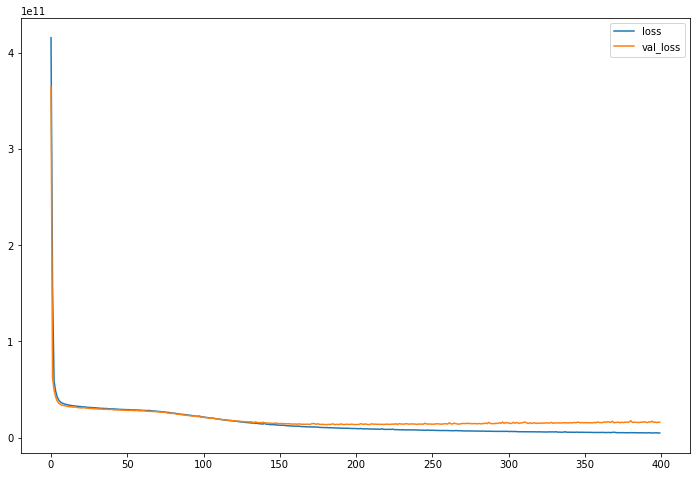

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [90]:
y_pred = model.predict(X_test)

In [91]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 68932.67
Mean Squared Error: 16019448063.23
Root Mean Squared Error: 126567.96
Variance score is: 0.88


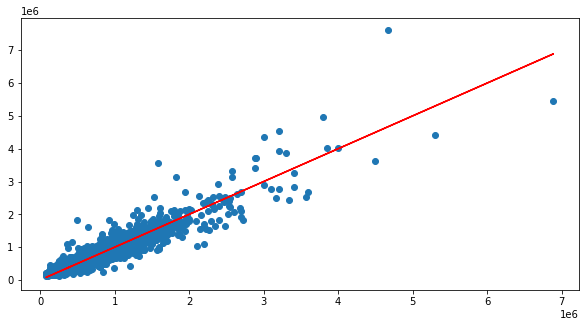

In [92]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
# Perfect predictions
plt.plot(y_test, y_test, 'r')

In [93]:
y_pred = y_pred.reshape(-1)
print(y_test.shape)
print(y_pred.shape)

(7133,)
(7133,)


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

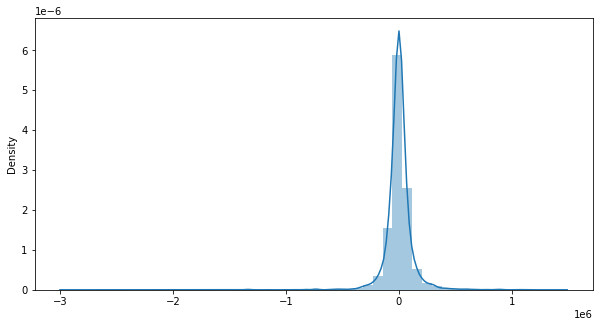

In [94]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test - y_pred)
sns.distplot(residuals)

In [95]:
single_house = Data.drop('price',axis = 1).iloc[0]
single_house = s_scaler.transform(single_house.values.reshape(-1,19))
model.predict(single_house)

array([[224812.55]], dtype=float32)

In [84]:
Data['price'][0]

221900.0